In [289]:
import pandas as pd
import numpy as np
import perf
import metrics

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline

In [554]:
! g++ -Wall -std=c++11 -O3 src/*.cpp -o ./bin/sgd

In [555]:
!time ./bin/sgd

0 : rmse train=0.951513, test=0.951425) | gini(train=0.178342, test=0.175916)
10000000 : rmse train=0.214935, test=0.216098) | gini(train=0.40161, test=0.397244)
Removing: CLI_nb_contrat_atr Norm2=0.00447107
Removing: CLI_nb_contrat_aup Norm2=0.00572749
Removing: CLI_nb_contrat_epa Norm2=0.00572514
Removing: CLI_nb_contrat_mrp Norm2=0.00657687
Removing: CLI_nb_contrat_mot Norm2=0.00808299
Removing: AUTA_tot2a Norm2=0.00910747
Removing: CLI_nb_contrat_prv Norm2=0.00924108
Removing: CLI_nb_contrat Norm2=0.00971854
Removing: CLI_nb_contrat_bqe Norm2=0.0103879
Removing: AUTA_tot1a Norm2=0.0105769
Removing: AUTA_tot4a Norm2=0.011341
Removing: CLI_tr_pm Norm2=0.0118749
Removing: CLI_nb_contrat_san Norm2=0.0121738
Removing: fire_quant_freq_20 Norm2=0.0122078
Removing: Random Norm2=0.0115848
Removing: Zone_inc_freq_iris Norm2=0.0128942
Removing: CLI_nb_contrat_hab Norm2=0.0131046
Removing: CLI_banque Norm2=0.0134708
Removing: CLI_tr_age_X_CSPf Norm2=0.0134027
Removing: CLI_nb_contrat_pju Norm2

mean: 0.045651 0.044627
rmse: 0.216108
gini: 0.4006790748034118
deviance: 12.188226319779071


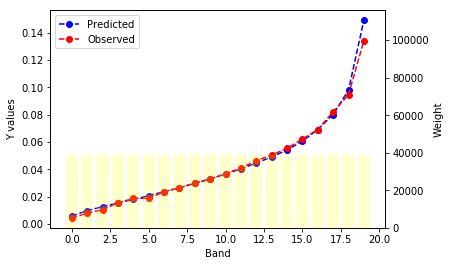

In [556]:
df = pd.read_csv("./data/results.csv")
print('mean:', round(np.sum(df.prediction) / np.sum(df.exposure), 6), round(np.sum(df.target) / np.sum(df.exposure), 6))
print('rmse:', round(perf.root_mean_square_error(df.target, df.prediction, df.exposure), 6))
print('gini:', metrics.gini_emblem_fast(df.target, df.prediction, df.exposure))
print('deviance:', np.log(metrics.poisson_deviance(df.target, df.prediction, df.exposure)))
metrics.plot_lift_curve(df.target, df.prediction, df.exposure, n_band=20)

In [558]:
n = 4459543
p = 134
def load_data(file_path, dtype='int32', shape=None):
    return np.memmap(file_path, dtype=dtype, shape=shape)

data = load_data('./data/observations.dat', dtype=np.dtype('u1'), shape=(n, p))

In [559]:
test_data = data[df.row,:]

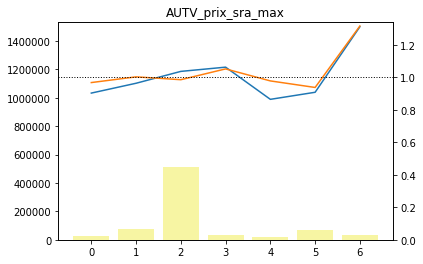

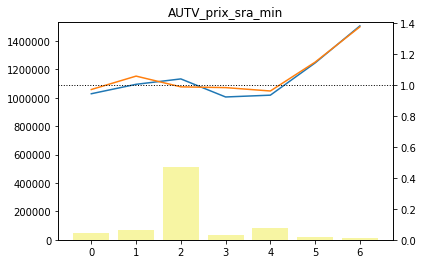

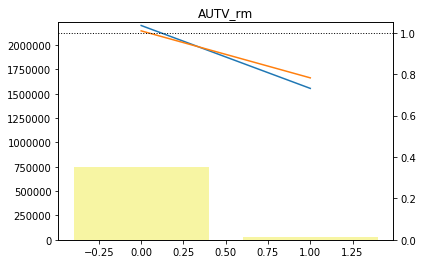

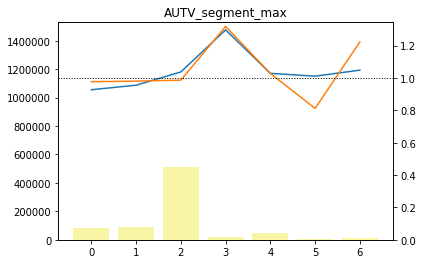

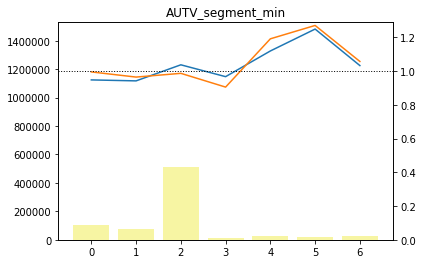

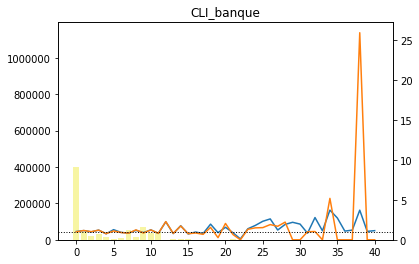

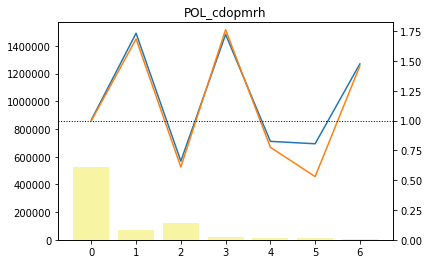

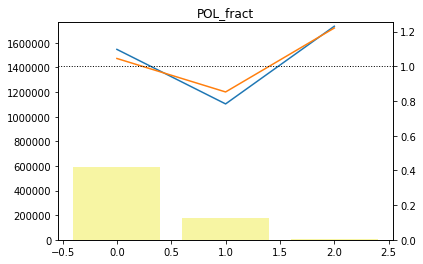

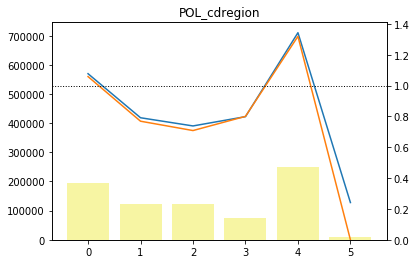

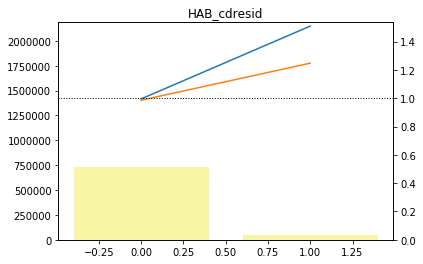

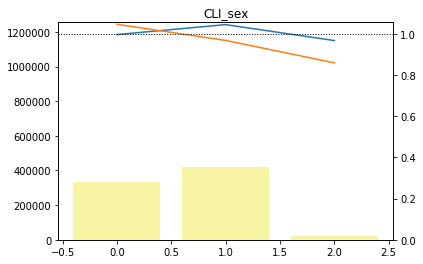

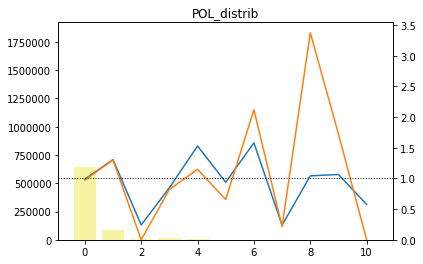

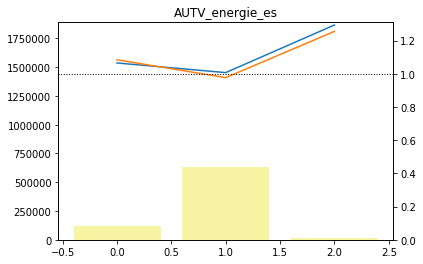

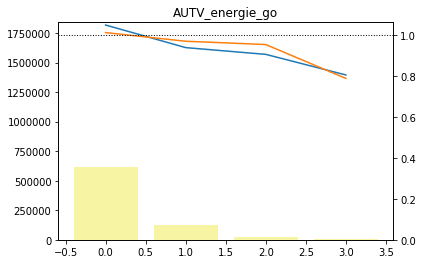

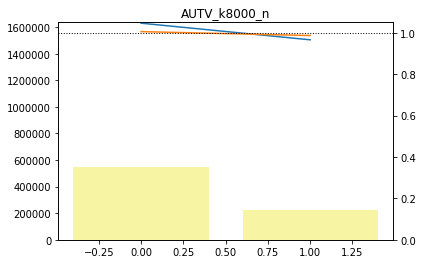

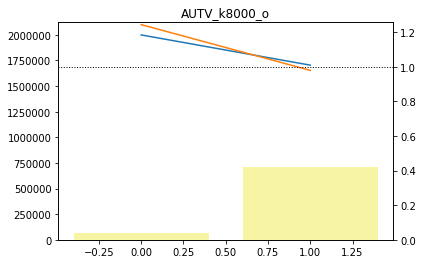

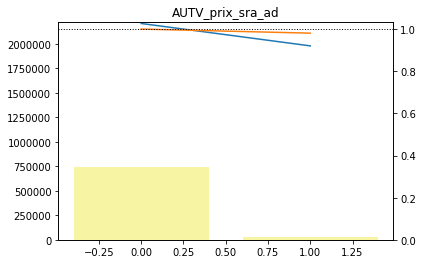

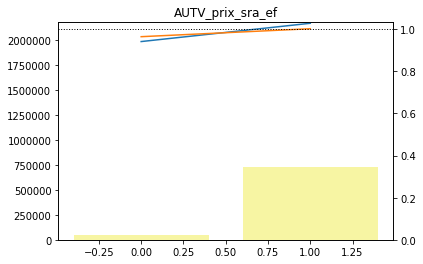

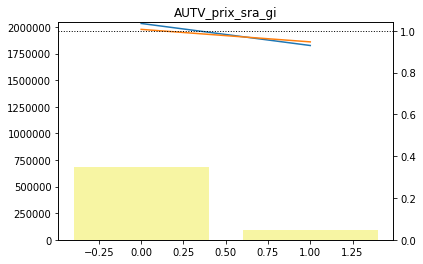

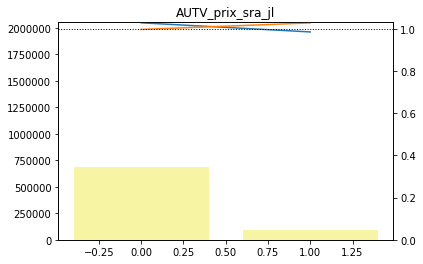

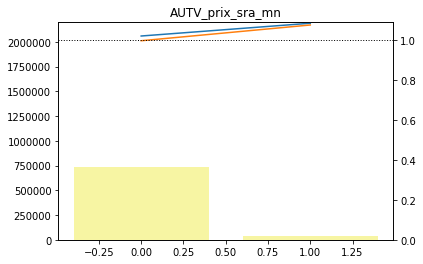

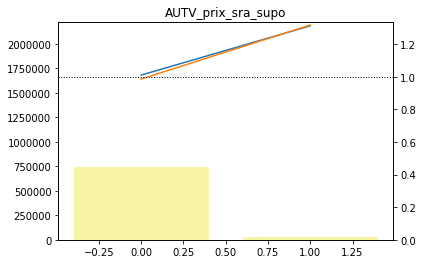

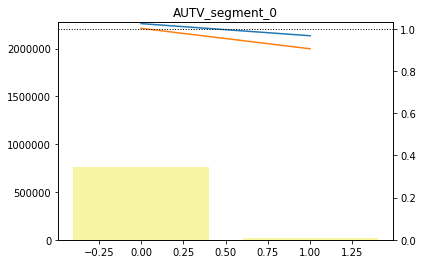

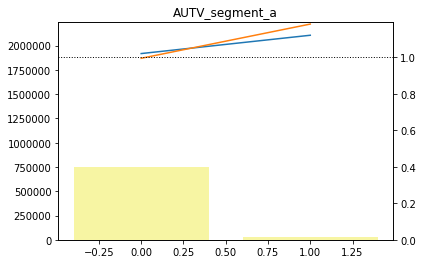

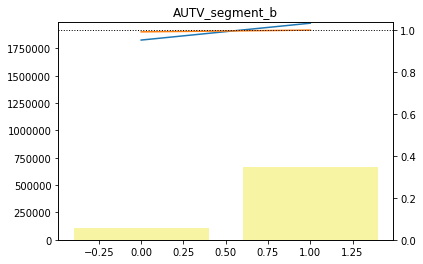

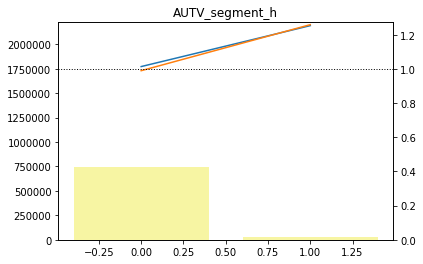

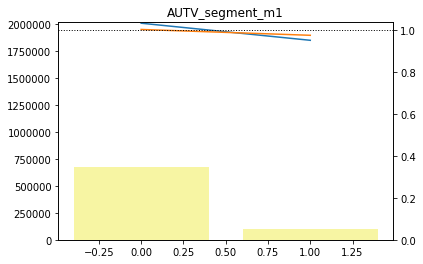

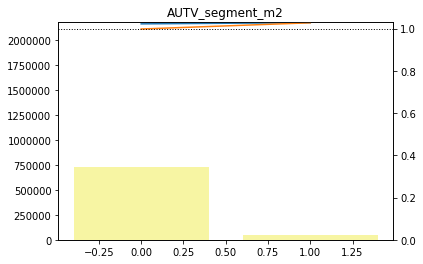

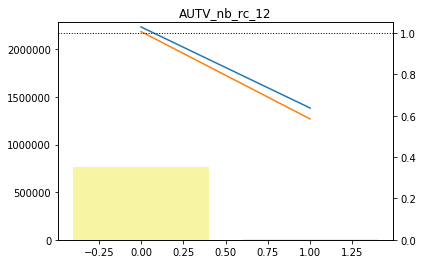

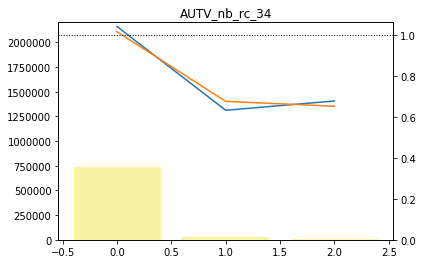

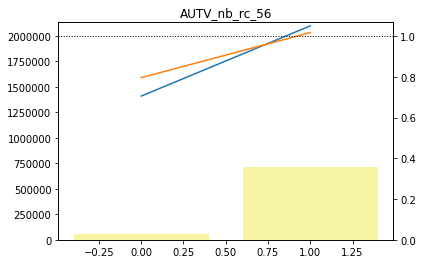

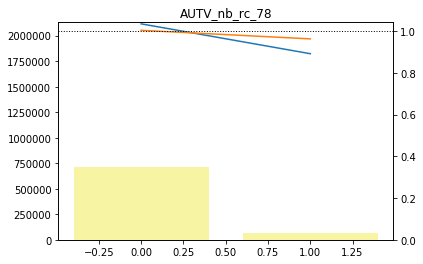

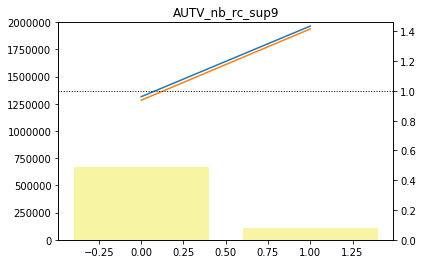

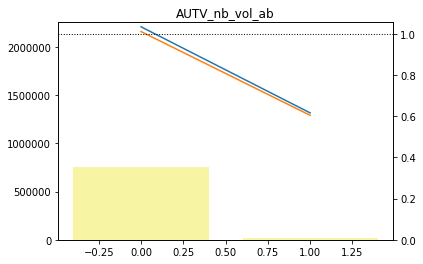

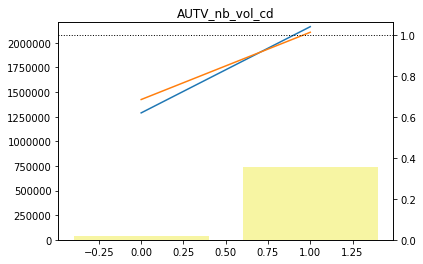

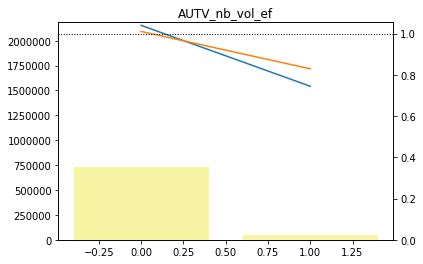

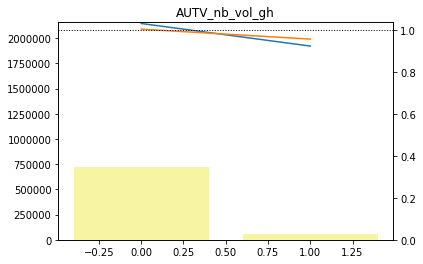

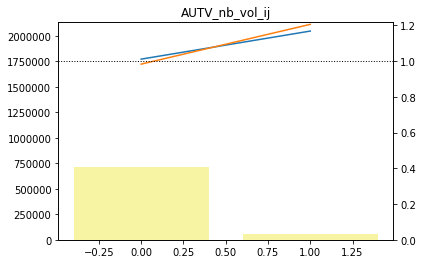

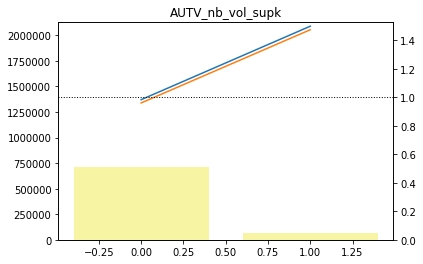

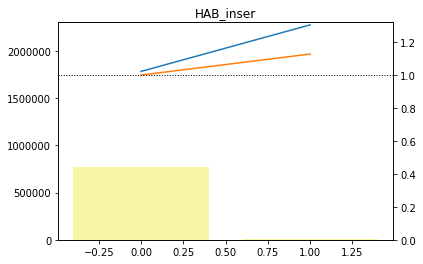

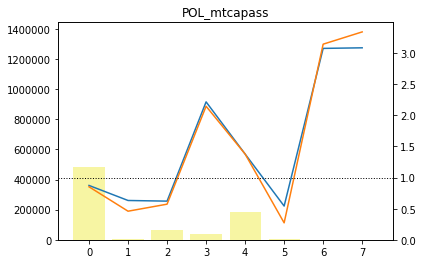

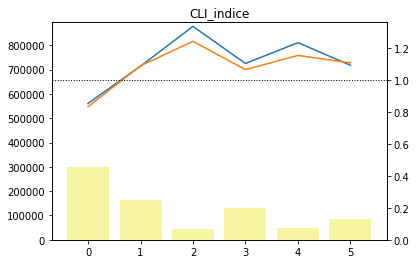

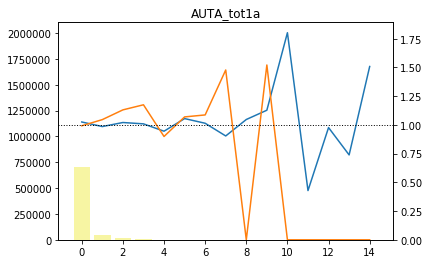

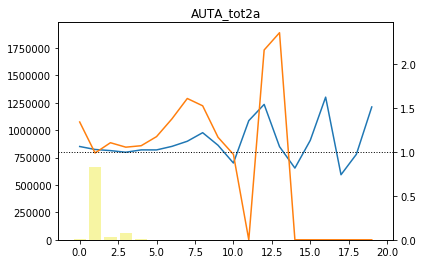

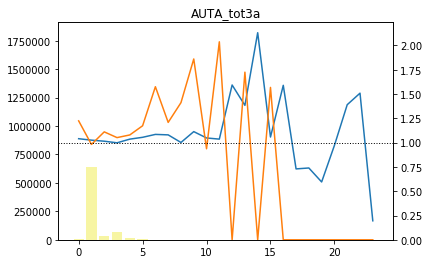

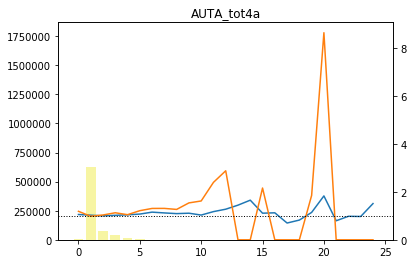

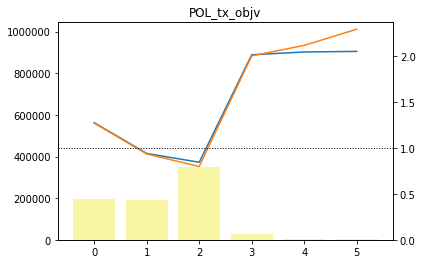

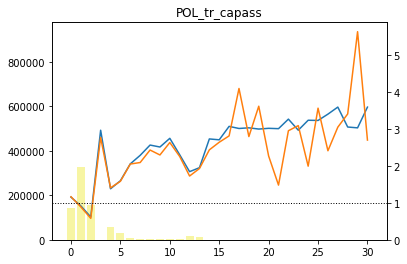

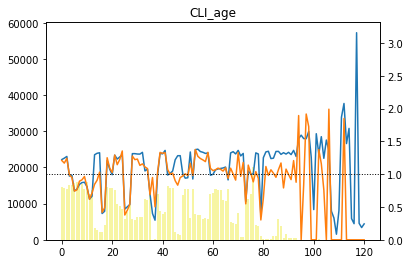

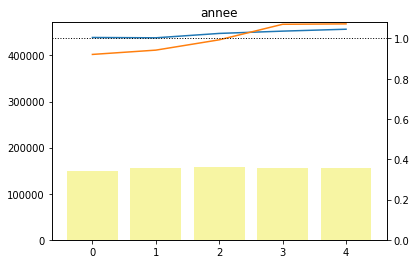

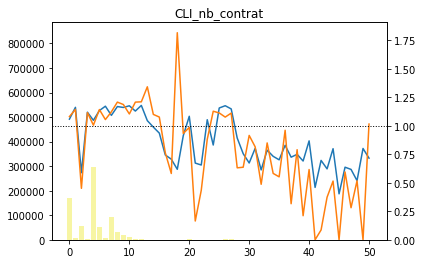

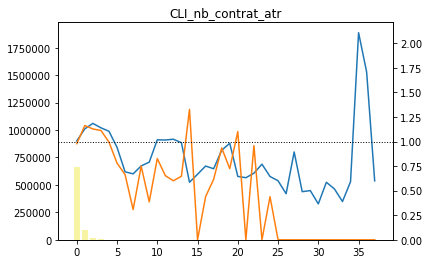

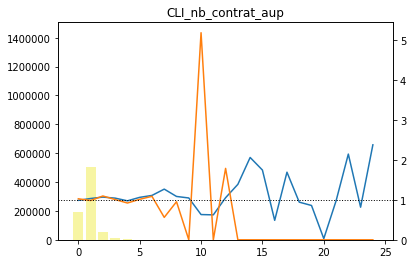

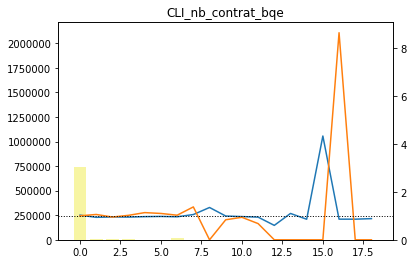

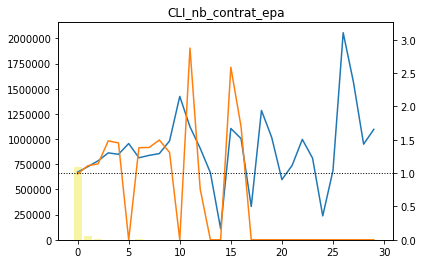

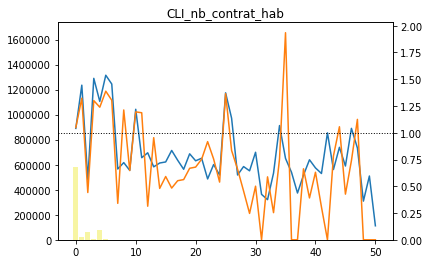

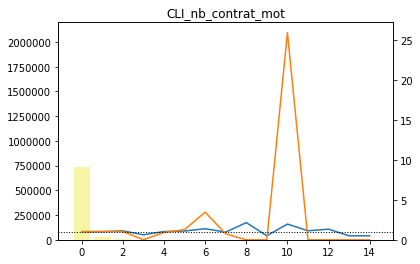

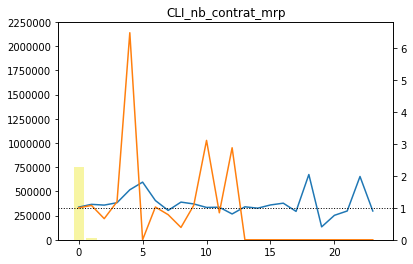

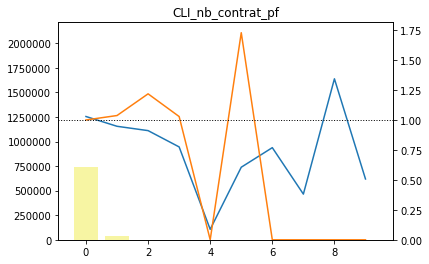

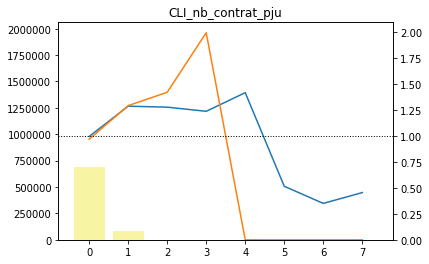

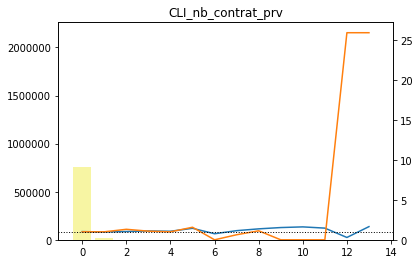

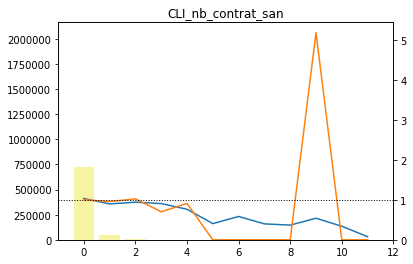

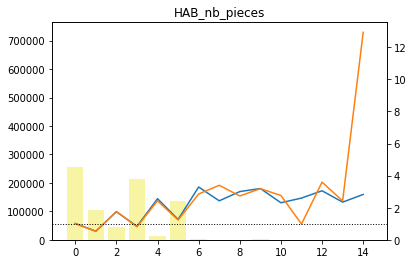

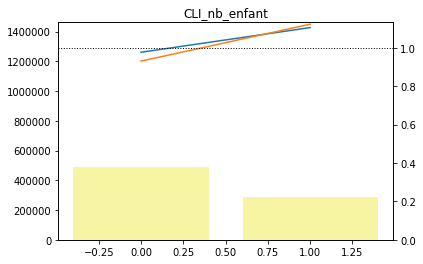

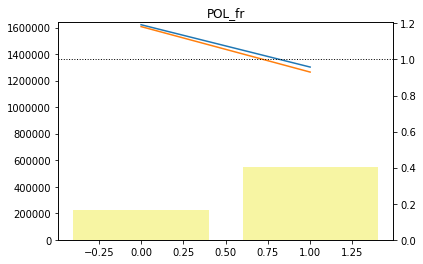

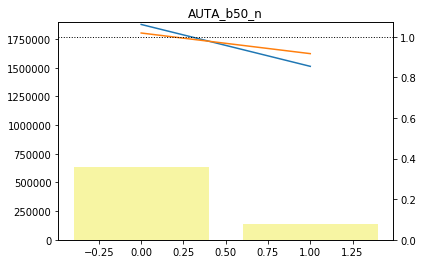

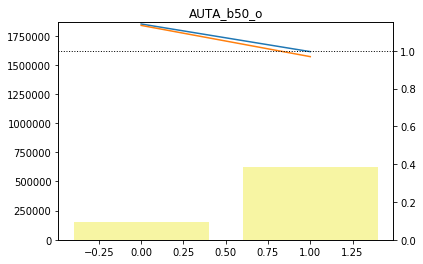

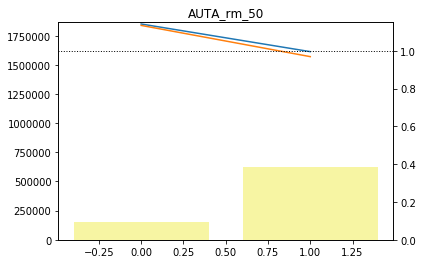

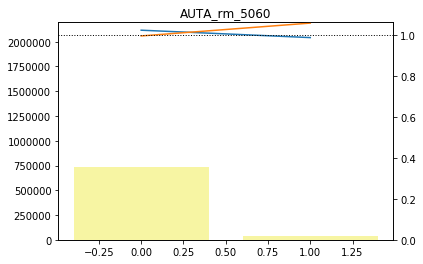

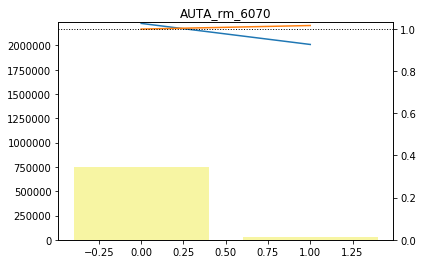

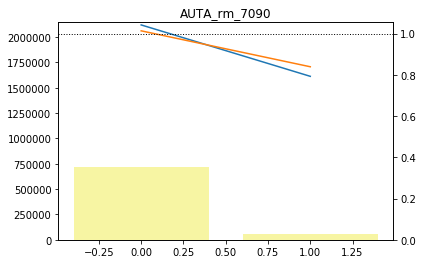

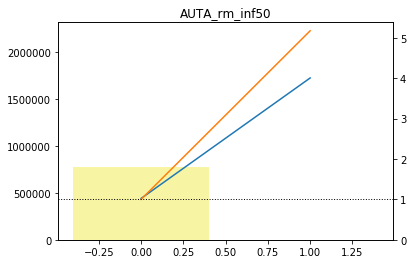

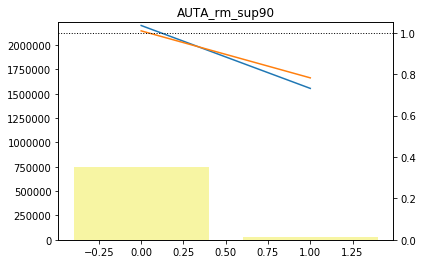

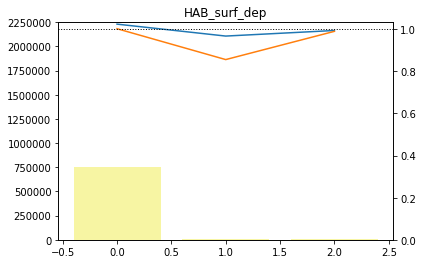

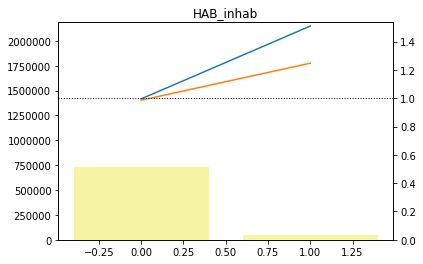

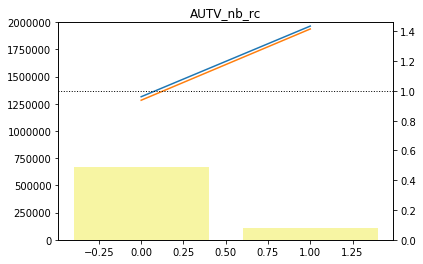

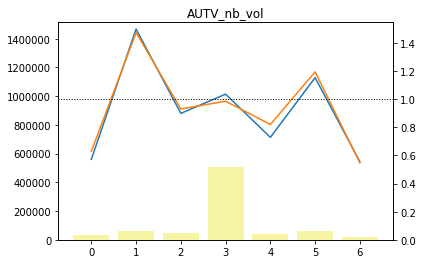

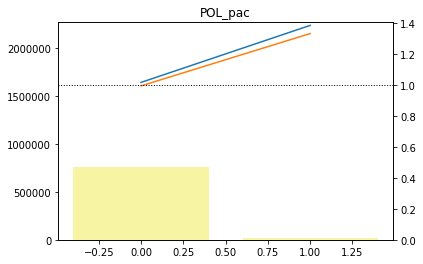

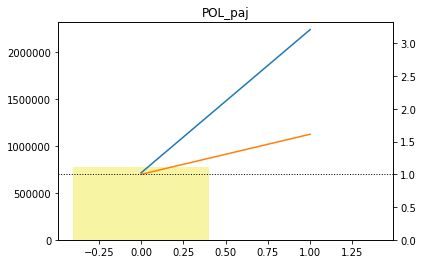

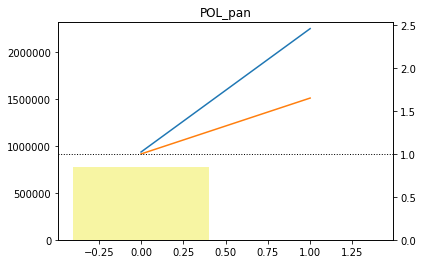

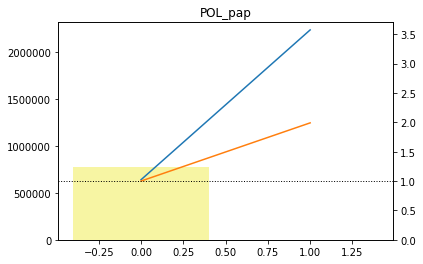

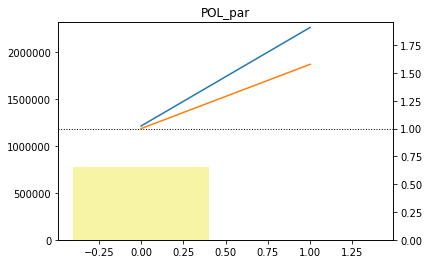

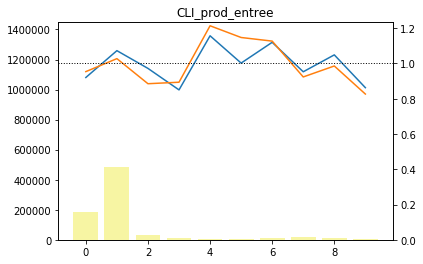

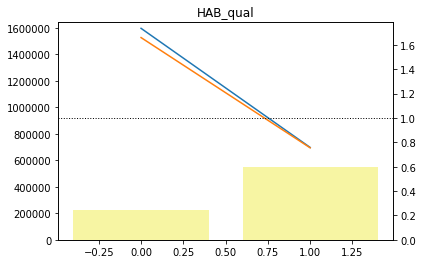

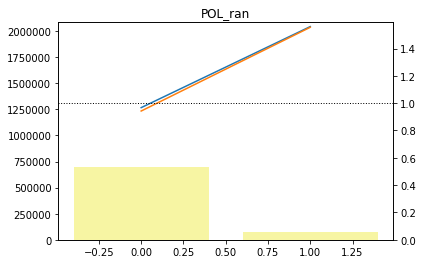

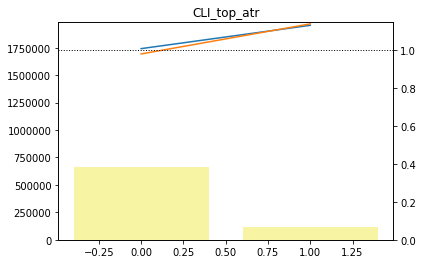

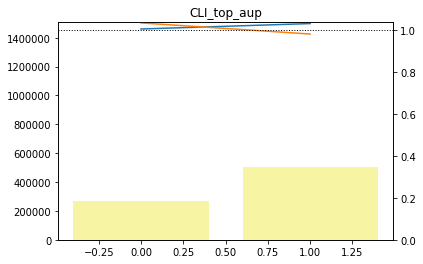

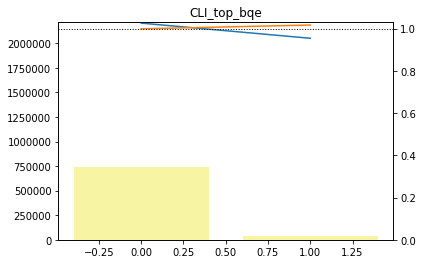

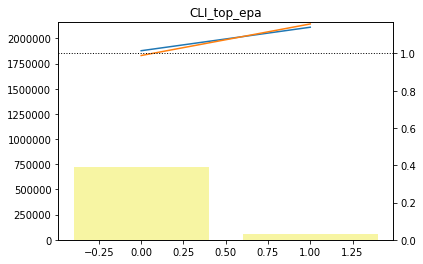

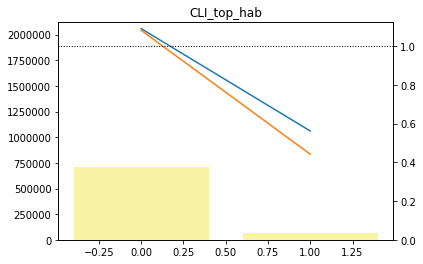

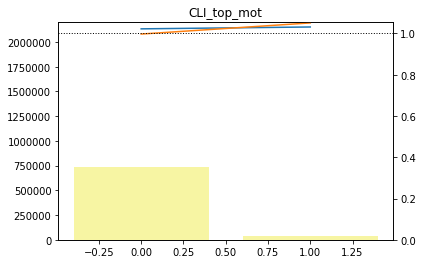

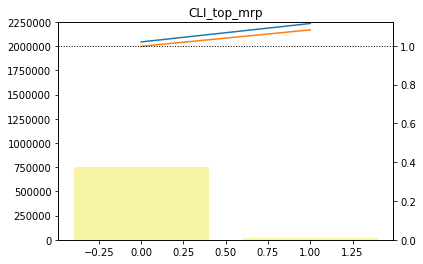

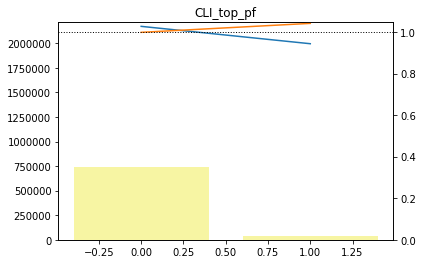

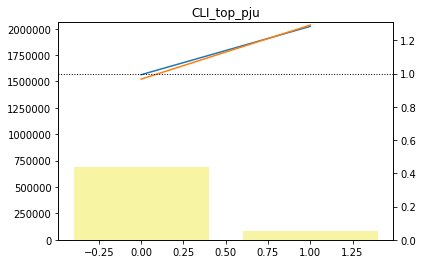

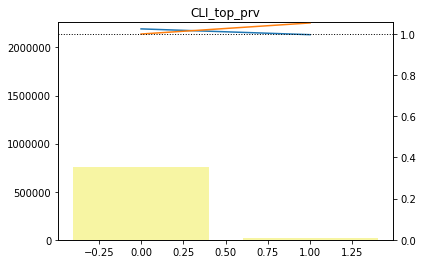

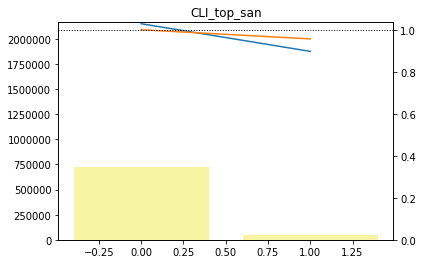

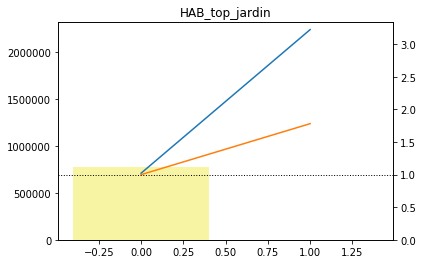

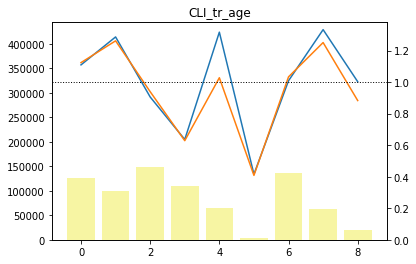

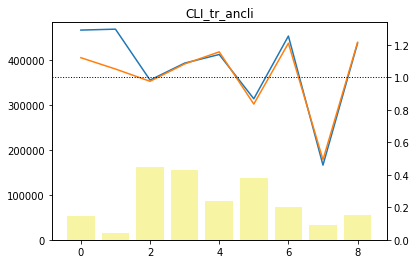

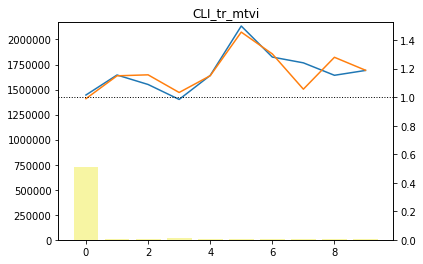

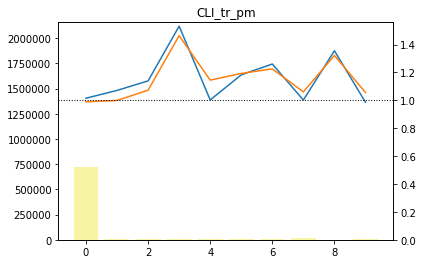

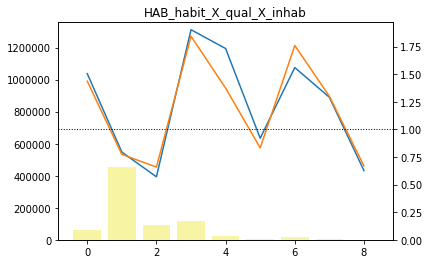

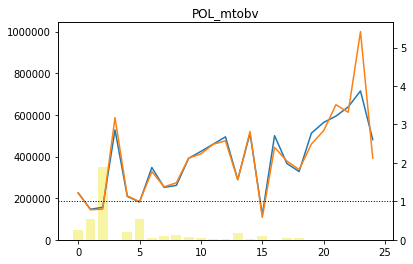

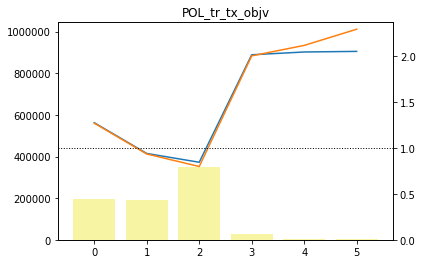

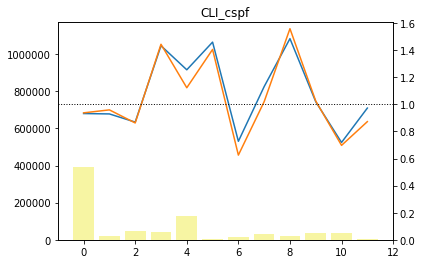

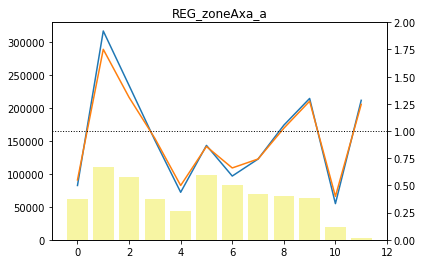

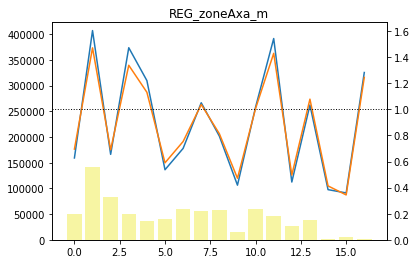

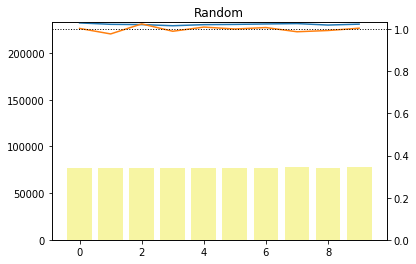

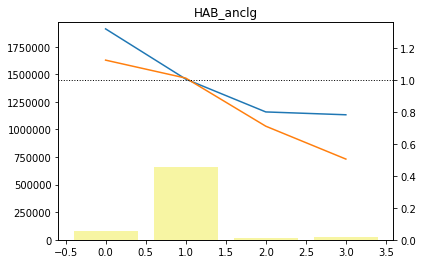

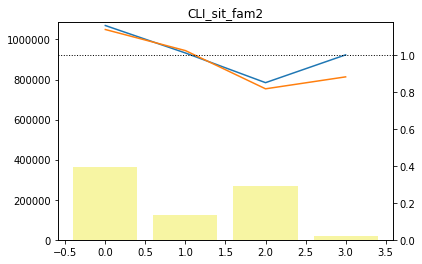

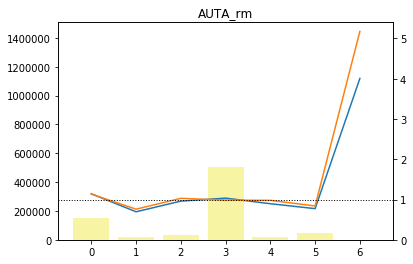

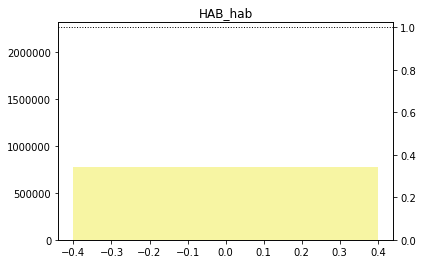

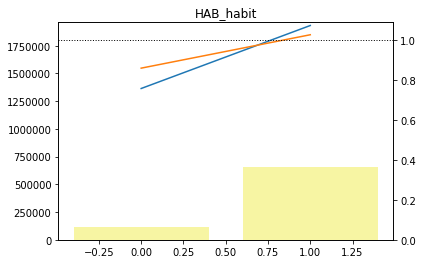

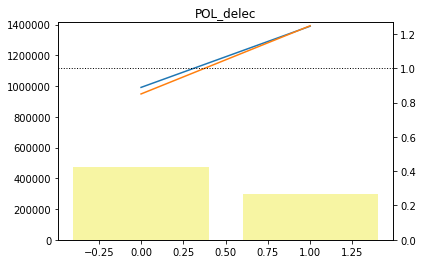

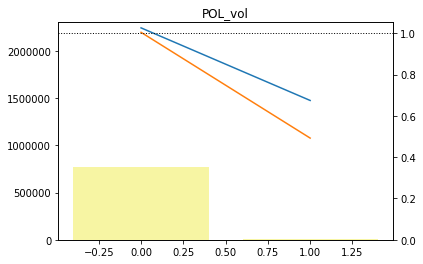

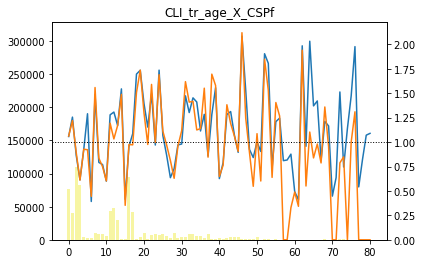

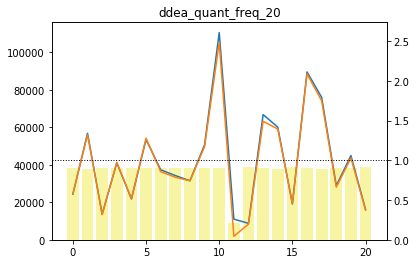

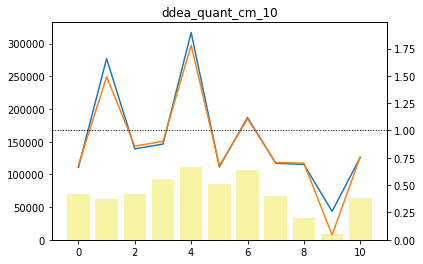

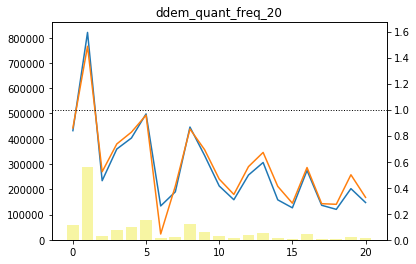

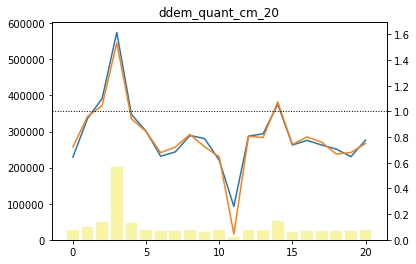

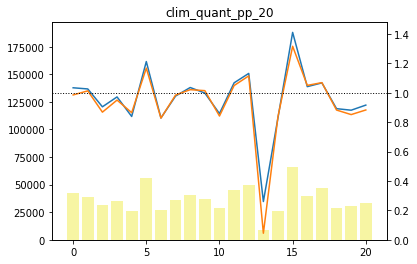

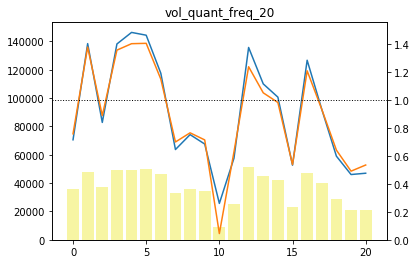

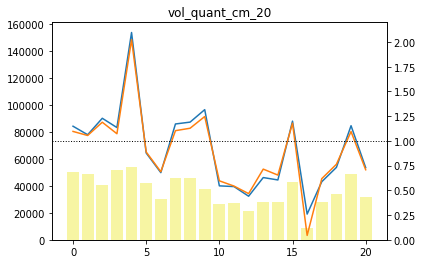

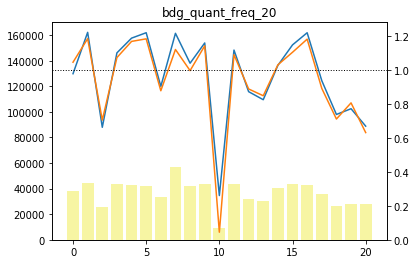

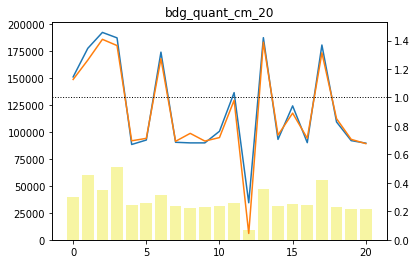

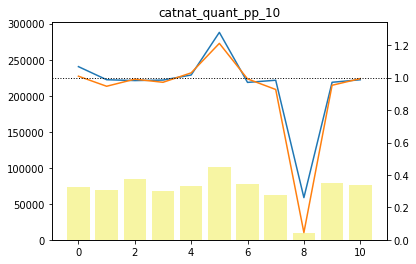

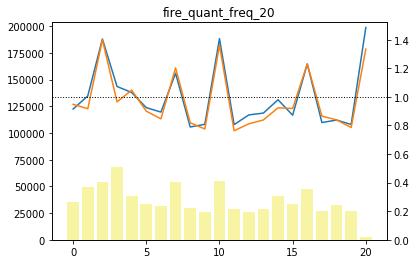

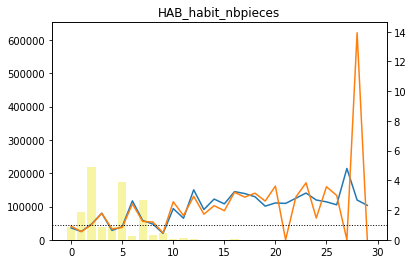

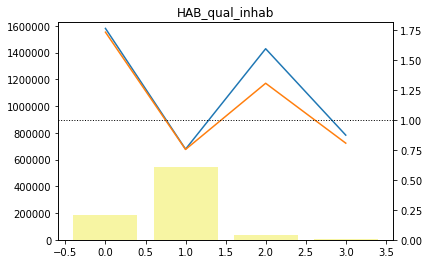

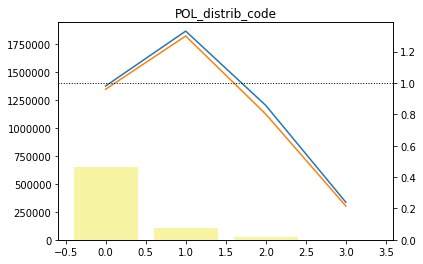

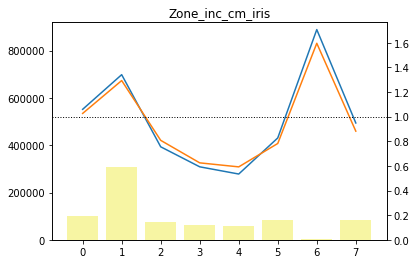

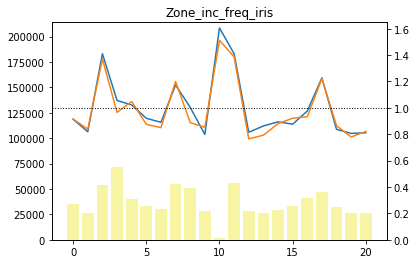

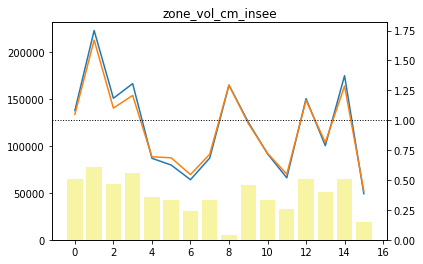

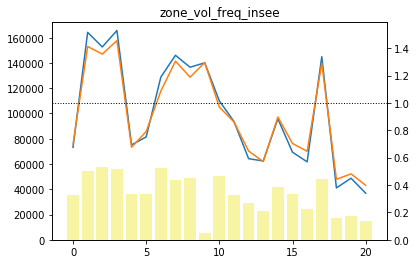

In [587]:
def plot_relativities(f):
    df['f'] = test_data[:, f]
    m = df.target.mean()
    relativity = df.groupby(['f']).agg({'exposure': 'sum', 'target': 'mean', 'prediction': 'mean'})
    relativity.target /= m
    relativity.prediction /= m
    relativity['one'] = 1
    size = relativity.prediction.size
    ar = np.arange(size)
    
    max_exposure = relativity.exposure.max()
    
    fig, ax1 = plt.subplots()

    ax1.bar(ar, relativity.exposure, color='#f7f5a3')
    ax1.set_ylim(ymax=max_exposure * 3)
  
    ax2 = ax1.twinx()
    ax2.set_title(features[f])
    ax2.plot(ar, relativity.prediction)
    ax2.plot(ar, relativity.target)
    ax2.axhline(y=1, color='black', linewidth=1, linestyle="dotted")
    ax2.set_ylim(ymin=0)
    
    plt.show()
    
for i, f in enumerate(features):
    plot_relativities(i)

In [ ]:
features = [
"AUTV_prix_sra_max",
"AUTV_prix_sra_min",
 "AUTV_rm",
 "AUTV_segment_max",
 "AUTV_segment_min",
 "CLI_banque",
 "POL_cdopmrh",
 "POL_fract",
 "POL_cdregion",
 "HAB_cdresid",
 "CLI_sex",
 "POL_distrib",
 "AUTV_energie_es",
 "AUTV_energie_go",
 "AUTV_k8000_n",
 "AUTV_k8000_o",
 "AUTV_prix_sra_ad",
 "AUTV_prix_sra_ef",
 "AUTV_prix_sra_gi",
 "AUTV_prix_sra_jl",
 "AUTV_prix_sra_mn",
 "AUTV_prix_sra_supo",
 "AUTV_segment_0",
 "AUTV_segment_a",
 "AUTV_segment_b",
 "AUTV_segment_h",
 "AUTV_segment_m1",
 "AUTV_segment_m2",
 "AUTV_nb_rc_12",
 "AUTV_nb_rc_34",
 "AUTV_nb_rc_56",
 "AUTV_nb_rc_78",
 "AUTV_nb_rc_sup9",
 "AUTV_nb_vol_ab",
 "AUTV_nb_vol_cd",
 "AUTV_nb_vol_ef",
 "AUTV_nb_vol_gh",
 "AUTV_nb_vol_ij",
 "AUTV_nb_vol_supk",
 "HAB_inser",
 "POL_mtcapass",
 "CLI_indice",
 "AUTA_tot1a",
 "AUTA_tot2a",
 "AUTA_tot3a",
 "AUTA_tot4a",
 "POL_tx_objv",
 "POL_tr_capass",
 "CLI_age",
 "annee",
 "CLI_nb_contrat",
 "CLI_nb_contrat_atr",
 "CLI_nb_contrat_aup",
 "CLI_nb_contrat_bqe",
 "CLI_nb_contrat_epa",
 "CLI_nb_contrat_hab",
 "CLI_nb_contrat_mot",
 "CLI_nb_contrat_mrp",
 "CLI_nb_contrat_pf",
 "CLI_nb_contrat_pju",
 "CLI_nb_contrat_prv",
 "CLI_nb_contrat_san",
 "HAB_nb_pieces",
 "CLI_nb_enfant",
 "POL_fr",
 "AUTA_b50_n",
 "AUTA_b50_o",
 "AUTA_rm_50",
 "AUTA_rm_5060",
 "AUTA_rm_6070",
 "AUTA_rm_7090",
 "AUTA_rm_inf50",
 "AUTA_rm_sup90",
 "HAB_surf_dep",
 "HAB_inhab",
 "AUTV_nb_rc",
 "AUTV_nb_vol",
 "POL_pac",
 "POL_paj",
 "POL_pan",
 "POL_pap",
 "POL_par",
 "CLI_prod_entree",
 "HAB_qual",
 "POL_ran",
 "CLI_top_atr",
 "CLI_top_aup",
 "CLI_top_bqe",
 "CLI_top_epa",
 "CLI_top_hab",
 "CLI_top_mot",
 "CLI_top_mrp",
 "CLI_top_pf",
 "CLI_top_pju",
 "CLI_top_prv",
 "CLI_top_san",
 "HAB_top_jardin",
 "CLI_tr_age",
 "CLI_tr_ancli",
 "CLI_tr_mtvi",
 "CLI_tr_pm",
 "HAB_habit_X_qual_X_inhab",
 "POL_mtobv",
 "POL_tr_tx_objv",
 "CLI_cspf",
 "REG_zoneAxa_a",
 "REG_zoneAxa_m",
 "Random",
 "HAB_anclg",
 "CLI_sit_fam2",
 "AUTA_rm",
 "HAB_hab",
 "HAB_habit",
 "POL_delec",
 "POL_vol",
 "CLI_tr_age_X_CSPf",
 "ddea_quant_freq_20",
 "ddea_quant_cm_10",
 "ddem_quant_freq_20",
 "ddem_quant_cm_20",
 "clim_quant_pp_20",
 "vol_quant_freq_20",
 "vol_quant_cm_20",
 "bdg_quant_freq_20",
 "bdg_quant_cm_20",
 "catnat_quant_pp_10",
 "fire_quant_freq_20",
 "HAB_habit_nbpieces",
 "HAB_qual_inhab",
 "POL_distrib_code",
 "Zone_inc_cm_iris",
 "Zone_inc_freq_iris",
 "zone_vol_cm_insee",
 "zone_vol_freq_insee",
]

In [534]:
for i, f in enumerate(features):
    print(i, f)

0 AUTV_prix_sra_max
1 AUTV_prix_sra_min
2 AUTV_rm
3 AUTV_segment_max
4 AUTV_segment_min
5 CLI_banque
6 POL_cdopmrh
7 POL_fract
8 POL_cdregion
9 HAB_cdresid
10 CLI_sex
11 POL_distrib
12 AUTV_energie_es
13 AUTV_energie_go
14 AUTV_k8000_n
15 AUTV_k8000_o
16 AUTV_prix_sra_ad
17 AUTV_prix_sra_ef
18 AUTV_prix_sra_gi
19 AUTV_prix_sra_jl
20 AUTV_prix_sra_mn
21 AUTV_prix_sra_supo
22 AUTV_segment_0
23 AUTV_segment_a
24 AUTV_segment_b
25 AUTV_segment_h
26 AUTV_segment_m1
27 AUTV_segment_m2
28 AUTV_nb_rc_12
29 AUTV_nb_rc_34
30 AUTV_nb_rc_56
31 AUTV_nb_rc_78
32 AUTV_nb_rc_sup9
33 AUTV_nb_vol_ab
34 AUTV_nb_vol_cd
35 AUTV_nb_vol_ef
36 AUTV_nb_vol_gh
37 AUTV_nb_vol_ij
38 AUTV_nb_vol_supk
39 HAB_inser
40 POL_mtcapass
41 CLI_indice
42 AUTA_tot1a
43 AUTA_tot2a
44 AUTA_tot3a
45 AUTA_tot4a
46 POL_tx_objv
47 POL_tr_capass
48 CLI_age
49 annee
50 CLI_nb_contrat
51 CLI_nb_contrat_atr
52 CLI_nb_contrat_aup
53 CLI_nb_contrat_bqe
54 CLI_nb_contrat_epa
55 CLI_nb_contrat_hab
56 CLI_nb_contrat_mot
57 CLI_nb_contrat_

In [533]:
features

['AUTV_prix_sra_max',
 'AUTV_prix_sra_min',
 'AUTV_rm',
 'AUTV_segment_max',
 'AUTV_segment_min',
 'CLI_banque',
 'POL_cdopmrh',
 'POL_fract',
 'POL_cdregion',
 'HAB_cdresid',
 'CLI_sex',
 'POL_distrib',
 'AUTV_energie_es',
 'AUTV_energie_go',
 'AUTV_k8000_n',
 'AUTV_k8000_o',
 'AUTV_prix_sra_ad',
 'AUTV_prix_sra_ef',
 'AUTV_prix_sra_gi',
 'AUTV_prix_sra_jl',
 'AUTV_prix_sra_mn',
 'AUTV_prix_sra_supo',
 'AUTV_segment_0',
 'AUTV_segment_a',
 'AUTV_segment_b',
 'AUTV_segment_h',
 'AUTV_segment_m1',
 'AUTV_segment_m2',
 'AUTV_nb_rc_12',
 'AUTV_nb_rc_34',
 'AUTV_nb_rc_56',
 'AUTV_nb_rc_78',
 'AUTV_nb_rc_sup9',
 'AUTV_nb_vol_ab',
 'AUTV_nb_vol_cd',
 'AUTV_nb_vol_ef',
 'AUTV_nb_vol_gh',
 'AUTV_nb_vol_ij',
 'AUTV_nb_vol_supk',
 'HAB_inser',
 'POL_mtcapass',
 'CLI_indice',
 'AUTA_tot1a',
 'AUTA_tot2a',
 'AUTA_tot3a',
 'AUTA_tot4a',
 'POL_tx_objv',
 'POL_tr_capass',
 'CLI_age',
 'annee',
 'CLI_nb_contrat',
 'CLI_nb_contrat_atr',
 'CLI_nb_contrat_aup',
 'CLI_nb_contrat_bqe',
 'CLI_nb_contrat_epa